# Santa Clara Housing

Housing discrimination (or not) analysis for Santa Clara county

Research Question:
- Are people from Black/Brown communities denied loans disportionately compare to those from the White community?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 140

## Data Import & Prep

In [2]:
FILENAME = "../data/santaclara.csv"

In [3]:
raw = pd.read_csv(FILENAME)

/var/folders/3m/vgnxqmds4f90384nbtx58yyr0000gp/T/ipykernel_76994/4083175689.py:1: DtypeWarning: Columns (0,34,36,38,44,46,48,68) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(FILENAME)


In [4]:
raw.shape

(635326, 78)

In [5]:
raw.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [6]:
raw.as_of_year.unique()

array([2017, '2017', 'hmda_2012_ca_all-records_labels.csv:"2012"',
       'hmda_2013_ca_all-records_labels.csv:"2013"',
       'hmda_2014_ca_all-records_labels.csv:"2014"',
       'hmda_2015_ca_all-records_labels.csv:"2015"',
       'hmda_2016_ca_all-records_labels.csv:"2016"'], dtype=object)

In [7]:
features = [
    'as_of_year',
    'loan_type_name', 'loan_type', 
    'property_type_name', 'property_type', 
    'loan_purpose_name', 'loan_purpose',
    'owner_occupancy_name', 'owner_occupancy', 
    'loan_amount_000s',
    'preapproval_name', 'preapproval', 
    'action_taken_name', 'action_taken',
    'applicant_ethnicity_name', 'applicant_ethnicity',
    'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
    'applicant_race_name_1', 'applicant_race_1', 
    'co_applicant_race_name_1', 'co_applicant_race_1',
    'applicant_sex_name',
    'applicant_sex', 'co_applicant_sex_name', 'co_applicant_sex',
    'applicant_income_000s', 'purchaser_type_name', 'purchaser_type',
    'denial_reason_name_1', 'denial_reason_1', 
    'rate_spread', 'hoepa_status_name', 'hoepa_status', 
    'population', 'minority_population', 'hud_median_family_income',
    'number_of_owner_occupied_units',
    'number_of_1_to_4_family_units', 
]

In [8]:
raw['loan_type'].unique()

array([1, 3, 2, 4])

In [9]:
raw['loan_type_name'].unique()

array(['Conventional', 'VA-guaranteed', 'FHA-insured',
       'FSA/RHS-guaranteed'], dtype=object)

In [10]:
X = raw[features]
X.shape

(635326, 39)

In [11]:
X.isna().sum()

as_of_year                             0
loan_type_name                         0
loan_type                              0
property_type_name                     0
property_type                          0
loan_purpose_name                      0
loan_purpose                           0
owner_occupancy_name                   0
owner_occupancy                        0
loan_amount_000s                      26
preapproval_name                       0
preapproval                            0
action_taken_name                      0
action_taken                           0
applicant_ethnicity_name               0
applicant_ethnicity                    0
co_applicant_ethnicity_name            0
co_applicant_ethnicity                 0
applicant_race_name_1                  0
applicant_race_1                       0
co_applicant_race_name_1               0
co_applicant_race_1                    0
applicant_sex_name                     0
applicant_sex                          0
co_applicant_sex

In [12]:
# Clean up those records with "null" (na) data

X.dropna(subset=['loan_amount_000s', 
                 'applicant_income_000s', 
                 'population', 
                 'minority_population', 
                 'minority_population',
                 'number_of_owner_occupied_units'],
            inplace=True)

/var/folders/3m/vgnxqmds4f90384nbtx58yyr0000gp/T/ipykernel_76994/2880226030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=['loan_amount_000s',


In [13]:
X.shape

(589413, 39)

In [14]:
X.isna().sum()

as_of_year                             0
loan_type_name                         0
loan_type                              0
property_type_name                     0
property_type                          0
loan_purpose_name                      0
loan_purpose                           0
owner_occupancy_name                   0
owner_occupancy                        0
loan_amount_000s                       0
preapproval_name                       0
preapproval                            0
action_taken_name                      0
action_taken                           0
applicant_ethnicity_name               0
applicant_ethnicity                    0
co_applicant_ethnicity_name            0
co_applicant_ethnicity                 0
applicant_race_name_1                  0
applicant_race_1                       0
co_applicant_race_name_1               0
co_applicant_race_1                    0
applicant_sex_name                     0
applicant_sex                          0
co_applicant_sex

## Exploratory Analysis

array([[<AxesSubplot: title={'center': 'loan_type'}>,
        <AxesSubplot: title={'center': 'property_type'}>,
        <AxesSubplot: title={'center': 'loan_purpose'}>,
        <AxesSubplot: title={'center': 'owner_occupancy'}>,
        <AxesSubplot: title={'center': 'loan_amount_000s'}>],
       [<AxesSubplot: title={'center': 'preapproval'}>,
        <AxesSubplot: title={'center': 'action_taken'}>,
        <AxesSubplot: title={'center': 'applicant_ethnicity'}>,
        <AxesSubplot: title={'center': 'co_applicant_ethnicity'}>,
        <AxesSubplot: title={'center': 'applicant_race_1'}>],
       [<AxesSubplot: title={'center': 'co_applicant_race_1'}>,
        <AxesSubplot: title={'center': 'applicant_sex'}>,
        <AxesSubplot: title={'center': 'co_applicant_sex'}>,
        <AxesSubplot: title={'center': 'applicant_income_000s'}>,
        <AxesSubplot: title={'center': 'purchaser_type'}>],
       [<AxesSubplot: title={'center': 'denial_reason_1'}>,
        <AxesSubplot: title={'cent

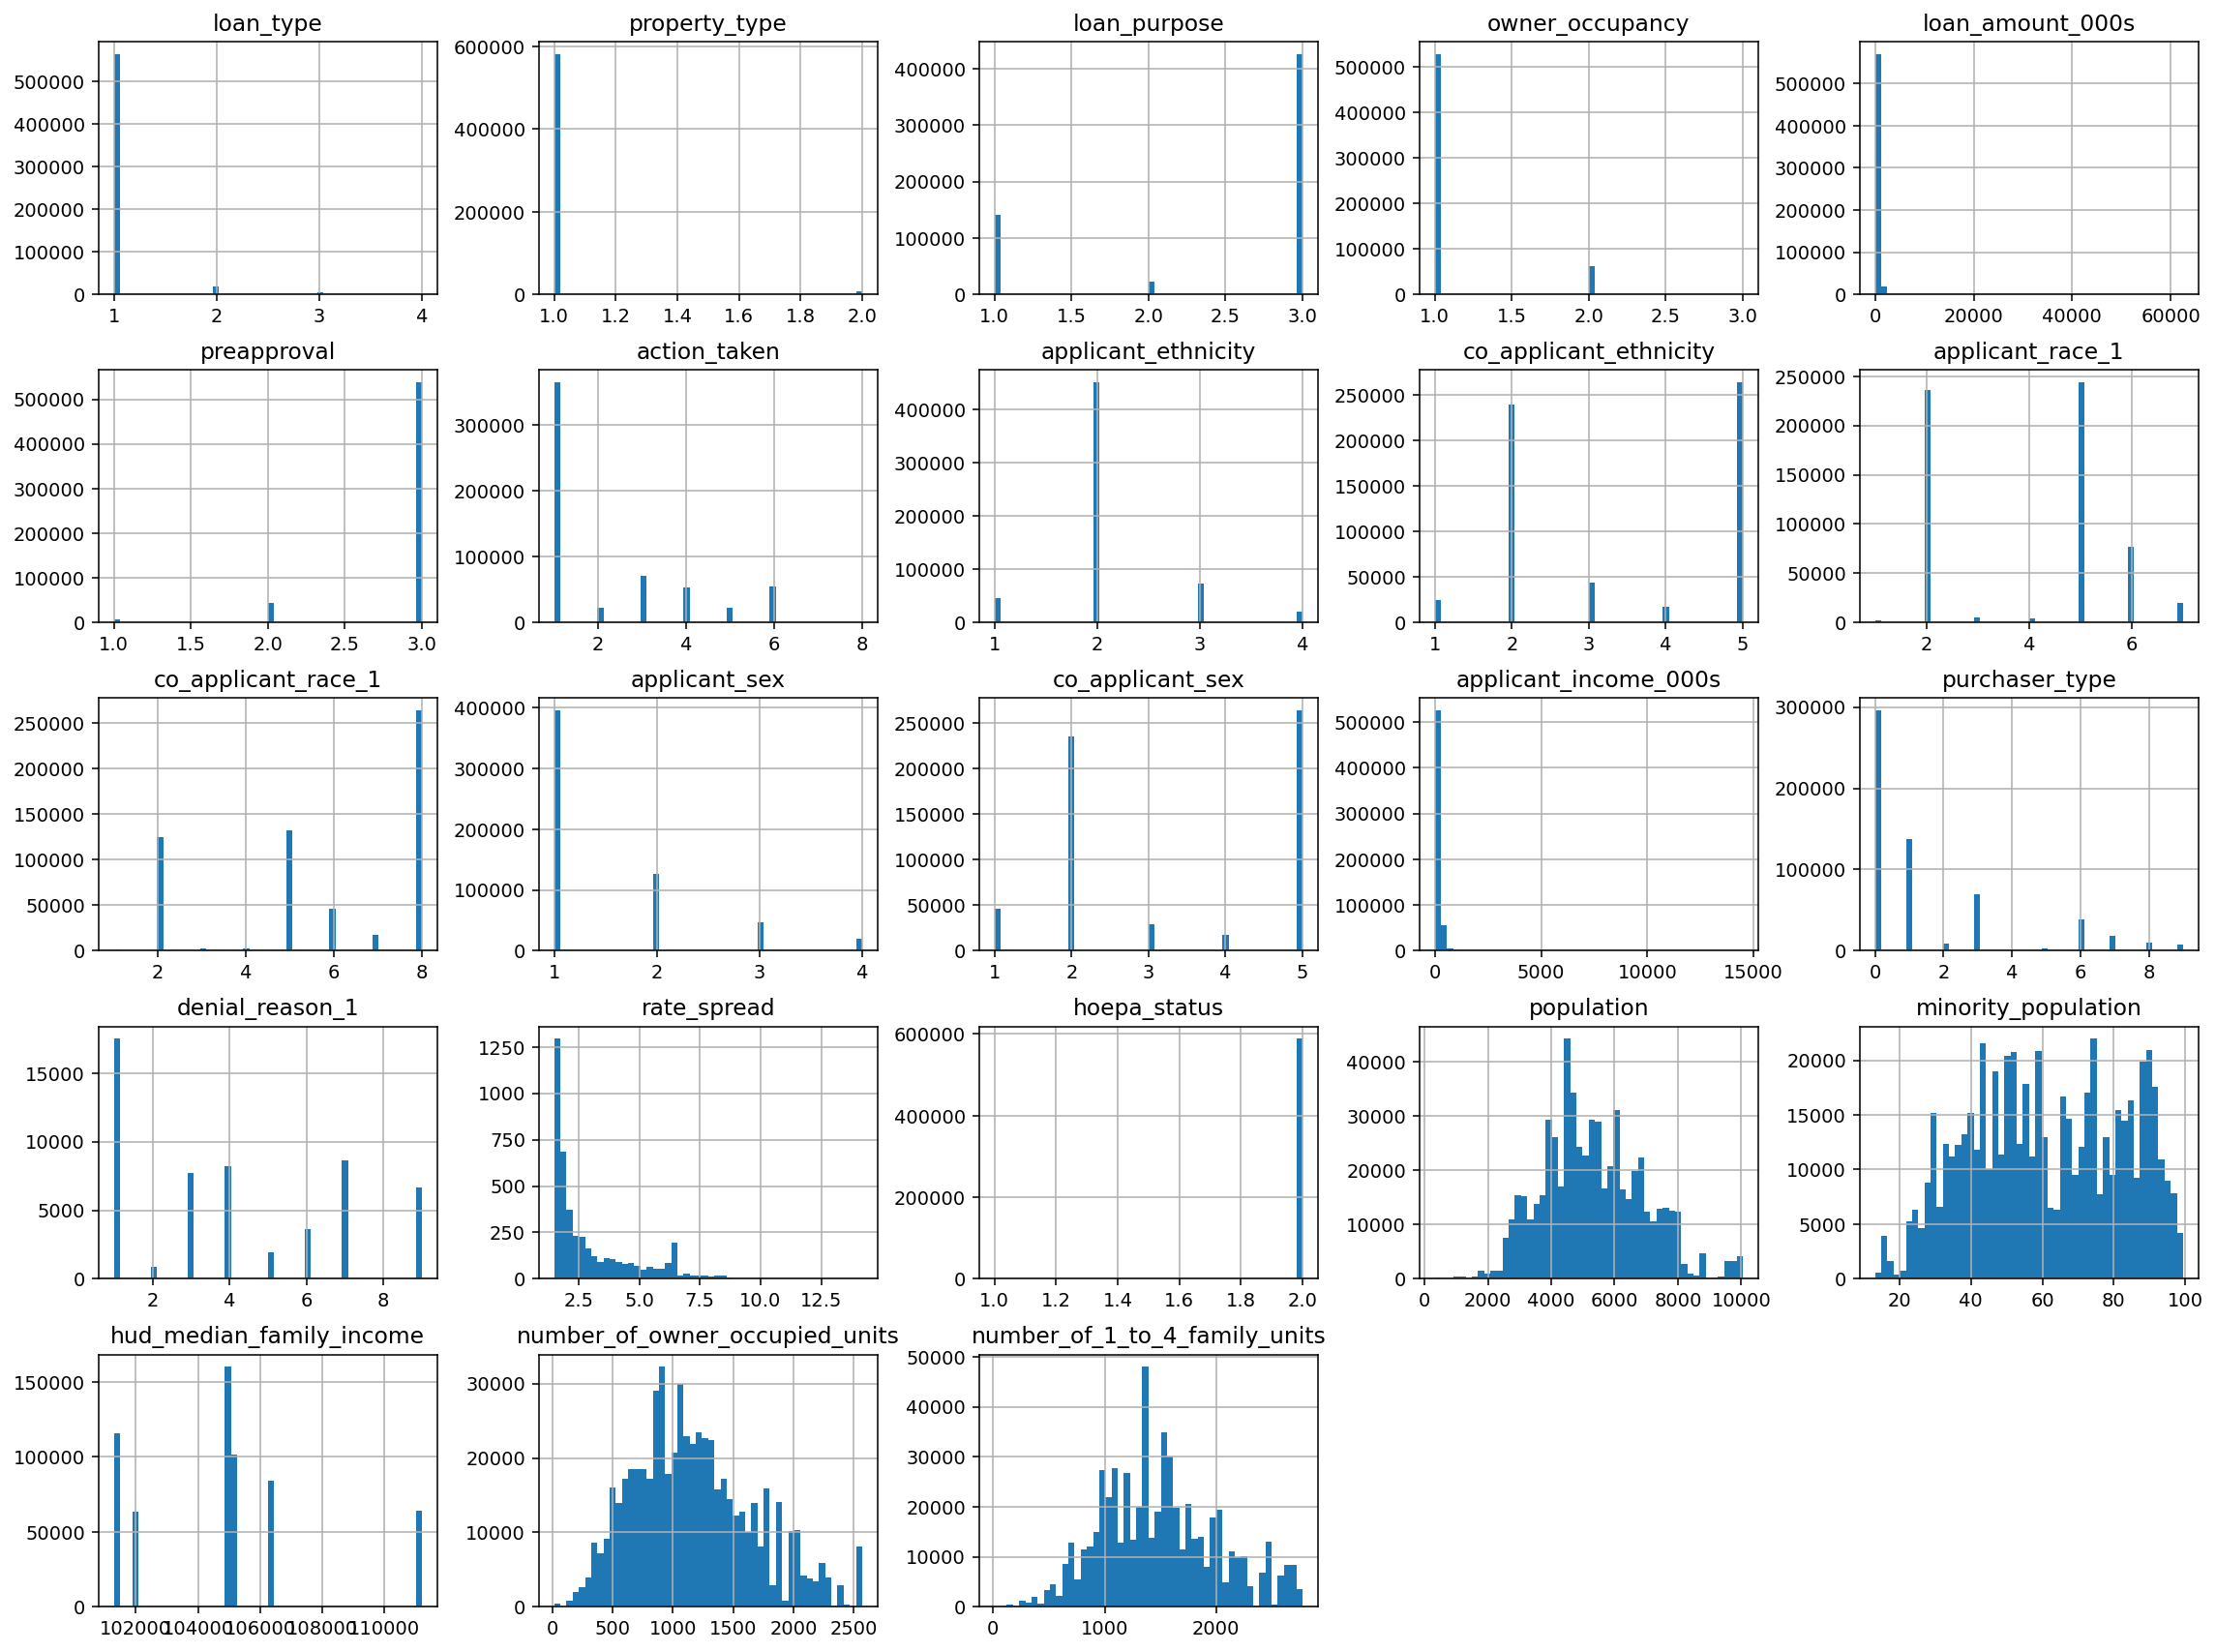

In [15]:
X.hist(bins=50, figsize=(20,15))

In [16]:
X['loan_purpose_name'].unique()

array(['Home purchase', 'Refinancing', 'Home improvement'], dtype=object)

In [17]:
X['loan_purpose'].unique()

array([1, 3, 2])

In [18]:
X['applicant_ethnicity_name'].unique()

array(['Not Hispanic or Latino',
       'Information not provided by applicant in mail, Internet, or telephone application',
       'Hispanic or Latino', 'Not applicable'], dtype=object)

In [19]:
X['applicant_race_name_1'].unique()

array(['Asian',
       'Information not provided by applicant in mail, Internet, or telephone application',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Black or African American', 'Not applicable',
       'American Indian or Alaska Native'], dtype=object)

In [20]:
race_mapping = {
'Asian': 'asian',
'Information not provided by applicant in mail, Internet, or telephone application': 'n/a',
'Native Hawaiian or Other Pacific Islander': 'islander', 
'White': 'white',
'Black or African American': 'black', 
'Not applicable': 'n/a',
'American Indian or Alaska Native': 'indigenous'
}

In [21]:
X['race_1'] = X['applicant_race_name_1'].apply(lambda x: race_mapping[x])

/var/folders/3m/vgnxqmds4f90384nbtx58yyr0000gp/T/ipykernel_76994/990326965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['race_1'] = X['applicant_race_name_1'].apply(lambda x: race_mapping[x])


In [22]:
X['race_1'].head(10)

0       asian
1       asian
2       asian
3         n/a
4         n/a
5    islander
6       white
7       white
8       white
9       asian
Name: race_1, dtype: object

In [23]:
X.head(10)

,as_of_year,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,...,denial_reason_1,rate_spread,hoepa_status_name,hoepa_status,population,minority_population,hud_median_family_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,race_1
0,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,676.0,...,NaN,NaN,Not a HOEPA loan,2,4875.0,81.809998,111200.0,1027.0,1382.0,asian
1,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Not owner-occupied as a principal dwelling,2,248.0,...,NaN,NaN,Not a HOEPA loan,2,6862.0,66.279999,111200.0,587.0,1074.0,asian
2,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,387.0,...,NaN,NaN,Not a HOEPA loan,2,5548.0,83.629997,111200.0,702.0,1006.0,asian
3,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,764.0,...,NaN,2.67,Not a HOEPA loan,2,5215.0,59.180000,111200.0,789.0,1002.0,n/a
4,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Not owner-occupied as a principal dwelling,2,723.0,...,NaN,NaN,Not a HOEPA loan,2,3354.0,37.599998,111200.0,783.0,886.0,n/a
5,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,2,Not owner-occupied as a principal dwelling,2,270.0,...,NaN,NaN,Not a HOEPA loan,2,5841.0,94.800003,111200.0,796.0,1208.0,islander
6,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,420.0,...,NaN,NaN,Not a HOEPA loan,2,4419.0,96.110001,111200.0,594.0,969.0,white
7,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,594.0,...,NaN,NaN,Not a HOEPA loan,2,4684.0,95.070000,111200.0,380.0,581.0,white
8,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,505.0,...,NaN,NaN,Not a HOEPA loan,2,6848.0,49.419998,111200.0,1844.0,2125.0,white
9,2017,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,2083.0,...,NaN,NaN,Not a HOEPA loan,2,3790.0,37.410000,111200.0,1049.0,1341.0,asian


In [24]:
# applicant_income_000s is likely the yearly income in $'000
X.applicant_income_000s.describe()

count    589413.000000
mean        175.489886
std         172.974988
min           1.000000
25%          99.000000
50%         144.000000
75%         209.000000
max       14490.000000
Name: applicant_income_000s, dtype: float64

In [25]:
# HUD: median family income in the 'neighborhood'

X.hud_median_family_income.describe()

count    589413.000000
mean     104835.527211
std        2853.644772
min      101300.000000
25%      101900.000000
50%      105000.000000
75%      106300.000000
max      111200.000000
Name: hud_median_family_income, dtype: float64

In [26]:
X.denial_reason_name_1.unique()

array([nan, 'Credit application incomplete', 'Unverifiable information',
       'Collateral', 'Debt-to-income ratio', 'Other', 'Credit history',
       'Insufficient cash (downpayment, closing costs)',
       'Employment history', 'Mortgage insurance denied'], dtype=object)

In [27]:
X[['action_taken', 'action_taken_name']]

,action_taken,action_taken_name
0,1,Loan originated
1,1,Loan originated
2,1,Loan originated
3,1,Loan originated
4,1,Loan originated
...,...,...
635239,6,Loan purchased by the institution
635240,6,Loan purchased by the institution
635241,6,Loan purchased by the institution
635242,6,Loan purchased by the institution


In [28]:
X['action_taken_name'].unique()

array(['Loan originated', 'Application denied by financial institution',
       'File closed for incompleteness',
       'Loan purchased by the institution',
       'Application withdrawn by applicant',
       'Application approved but not accepted',
       'Preapproval request denied by financial institution',
       'Preapproval request approved but not accepted'], dtype=object)

In [29]:
approved_df = X[X.action_taken == 1]
approved_df.shape

(365460, 40)

In [30]:
denied_df = X[~X.index.isin(approved_df.index)]
denied_df.shape

(223953, 40)

<AxesSubplot: >

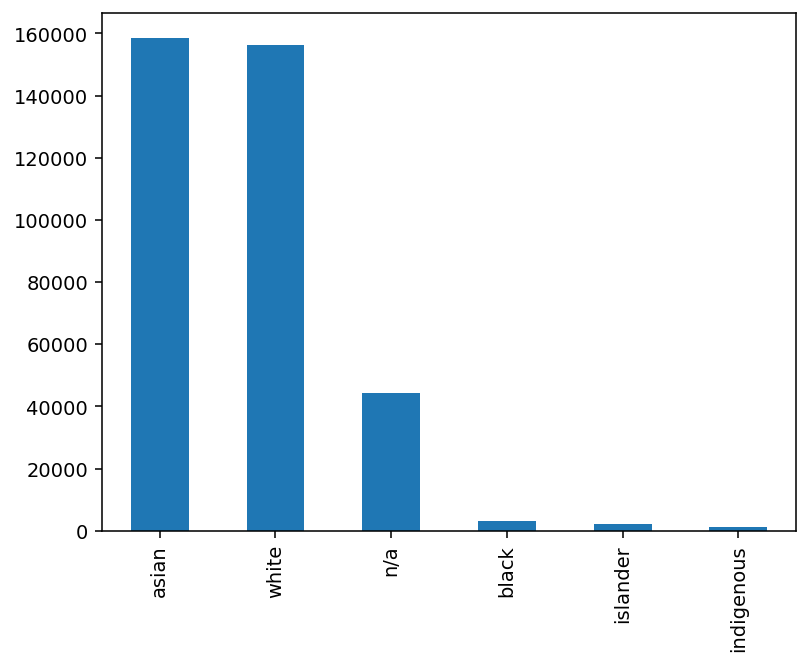

In [31]:
approved_df.race_1.value_counts().plot.bar(stacked=True)

In [32]:
X.race_1.value_counts()

white         244073
asian         236307
n/a            97050
black           5512
islander        4045
indigenous      2426
Name: race_1, dtype: int64

In [33]:
approved_df.race_1.value_counts()

asian         158519
white         156291
n/a            44170
black           3014
islander        2208
indigenous      1258
Name: race_1, dtype: int64

In [34]:
approved_ratios = approved_df.race_1.value_counts() / X.race_1.value_counts()

<AxesSubplot: >

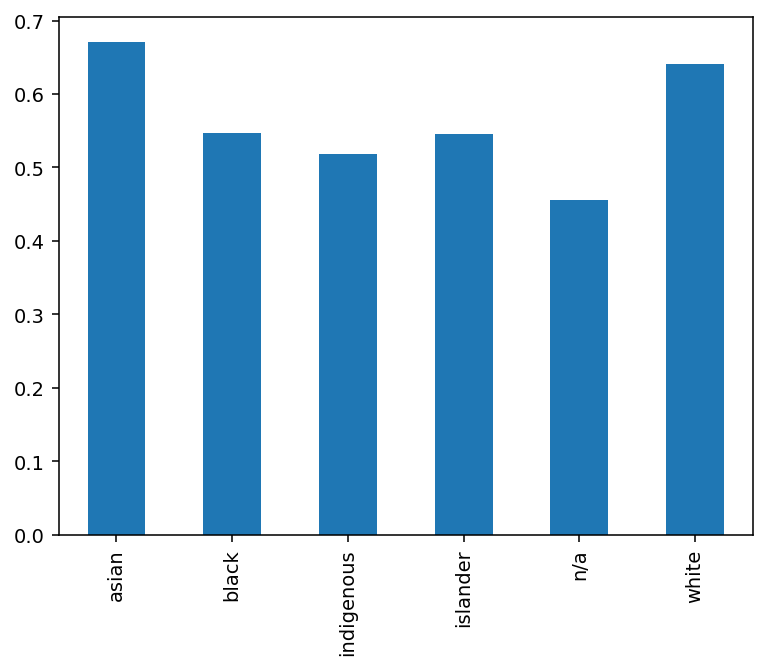

In [35]:
approved_ratios.plot.bar(stacked=True)

In [36]:
approved_ratios

asian         0.670818
black         0.546807
indigenous    0.518549
islander      0.545859
n/a           0.455126
white         0.640345
Name: race_1, dtype: float64

<AxesSubplot: >

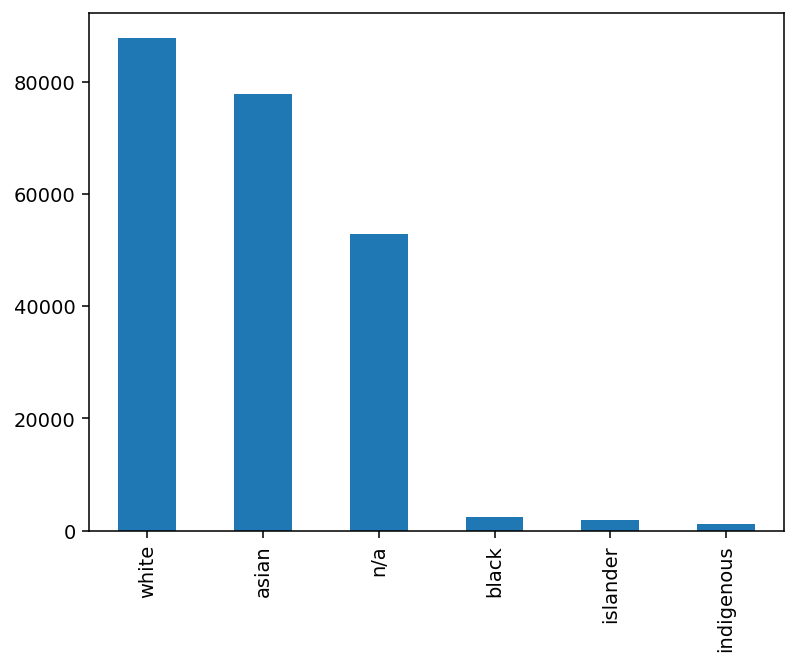

In [37]:
denied_df.race_1.value_counts().plot.bar(stacked=True)

In [38]:
denied_ratio_series = denied_df.race_1.value_counts() / X.race_1.value_counts()

<AxesSubplot: >

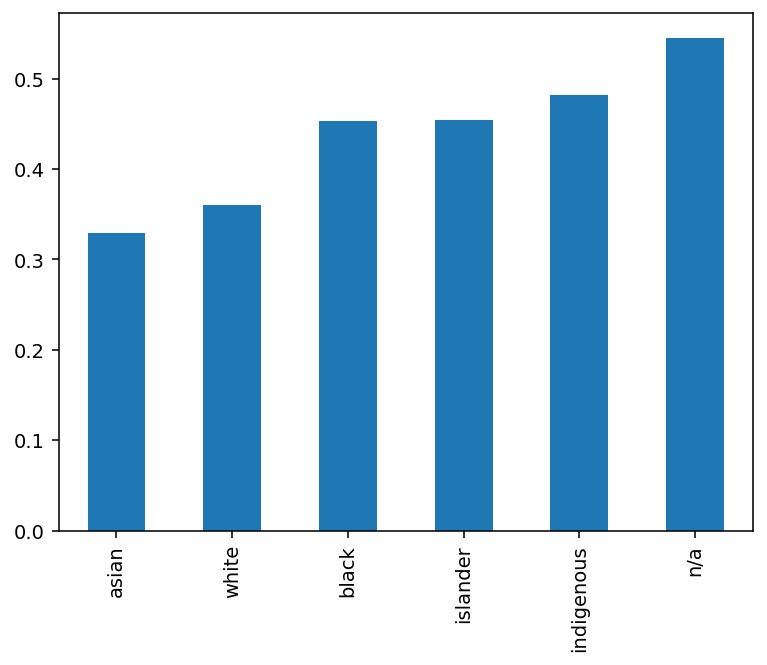

In [39]:
denied_ratio_series.sort_values().plot.bar(stacked=True)

## Statistical Significant Analysis

## Build ML Models to "predict" approval based on personal characteristics

In [40]:
X['action_taken_name'].unique()

array(['Loan originated', 'Application denied by financial institution',
       'File closed for incompleteness',
       'Loan purchased by the institution',
       'Application withdrawn by applicant',
       'Application approved but not accepted',
       'Preapproval request denied by financial institution',
       'Preapproval request approved but not accepted'], dtype=object)

In [41]:
X['action_taken'].unique()

array([1, 3, 5, 6, 4, 2, 7, 8])

In [42]:
set(list(zip(X['action_taken'], X['action_taken_name'])))

{(1, 'Loan originated'),
 (2, 'Application approved but not accepted'),
 (3, 'Application denied by financial institution'),
 (4, 'Application withdrawn by applicant'),
 (5, 'File closed for incompleteness'),
 (6, 'Loan purchased by the institution'),
 (7, 'Preapproval request denied by financial institution'),
 (8, 'Preapproval request approved but not accepted')}

In [43]:
# we want to have clear "outcomes" that we understand are related to
# whether a loan is approved or denied: [1,3,5] seem reasonable
housing_df = X[X.action_taken.isin([1,3,5])]
housing_df.shape

(458403, 40)

In [44]:
housing_df['race_1'].unique()

array(['asian', 'n/a', 'islander', 'white', 'black', 'indigenous'],
      dtype=object)

In [45]:
# let's also simplify our analysis on race to white, asian, and black
housing_df = housing_df[housing_df.race_1.isin(['white', 'asian', 'black'])]
housing_df.shape

(392605, 40)

In [46]:
housing_df['action_taken'].value_counts()

1    317824
3     58502
5     16279
Name: action_taken, dtype: int64

In [47]:
housing_df['race_1'].value_counts()

white    195585
asian    192702
black      4318
Name: race_1, dtype: int64

In [48]:
housing_df['approved'] = \
    housing_df['action_taken'].apply(lambda x: 1 if x == 1 else 0)
housing_df.approved.value_counts()

1    317824
0     74781
Name: approved, dtype: int64

In [49]:
housing_df.shape

(392605, 41)

## One-hot encoding of key features

In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [51]:
# Fit and transform the categorical column into indicator variables
indicator_variables = encoder.fit_transform(housing_df[['race_1']]).toarray()
indicator_variables.shape

(392605, 3)

In [52]:
# Create a new DataFrame with the indicator variables
race_indicator = pd.DataFrame(indicator_variables, columns=encoder.get_feature_names_out(['race_1']))
race_indicator.shape

(392605, 3)

In [53]:
race_indicator[:5]

,race_1_asian,race_1_black,race_1_white
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [54]:
housing_df.shape

(392605, 41)

In [55]:
combined = housing_df.join(race_indicator)
combined.shape

(392605, 44)

In [56]:
# Clean up those records with "null" (na) data

combined.dropna(subset=['race_1_asian', 'race_1_black', 'race_1_white'],
         inplace=True)
combined.shape

(245733, 44)

In [57]:
combined.columns

Index(['as_of_year', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'co_applicant_race_name_1',
       'co_applicant_race_1', 'applicant_sex_name', 'applicant_sex',
       'co_applicant_sex_name', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type_name', 'purchaser_type', 'denial_reason_name_1',
       'denial_reason_1', 'rate_spread', 'hoepa_status_name', 'hoepa_status',
       'population', 'minority_population', 'hud_median_family_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'race_1', 'approved', 'race_1_asian', 'race_1_black', 'race_1_whi

In [58]:
selected_features = ['loan_amount_000s', 
                     'applicant_income_000s',
                     'minority_population',
                     'race_1_asian', 
                     'race_1_black',
                     'race_1_white',
                    ]
input = combined[selected_features]
input.shape

(245733, 6)

In [59]:
target = combined.approved

## Train vs Test data splits

In [71]:
from sklearn.datasets import load_iris
irisData = load_iris()
A, b = irisData["data"], irisData["target"]
type(A), A.shape

(numpy.ndarray, (150, 4))

### Simple random split

In [60]:
# test train split
from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = \
    train_test_split(input, target, test_size=0.30, random_state=0)

### Stratified Shuffle split

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [70]:
type(input), input.shape, type(target), target.shape

(pandas.core.frame.DataFrame,
 (245733, 6),
 pandas.core.series.Series,
 (245733,))

In [74]:
for train_index, test_index in stratSplit.split(input, target):
    print(f"{max(train_index)}, {max(test_index)}")
    X_train, X_test = input.iloc[train_index], input.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

245731, 245732


In [ ]:
for

## Decision Tree for classification

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import pydotplus  # for tree visualization
from IPython.display import Image 
tree_model = DecisionTreeClassifier(random_state=0,max_depth=4)

tree_model.fit(input_train, target_train)

target_pred = tree_model.predict(input_test)
(target_test - target_pred).map(lambda x: x*x).sum()

12737

In [62]:
tree_model.score(input_test,target_test)

0.8272246337493218

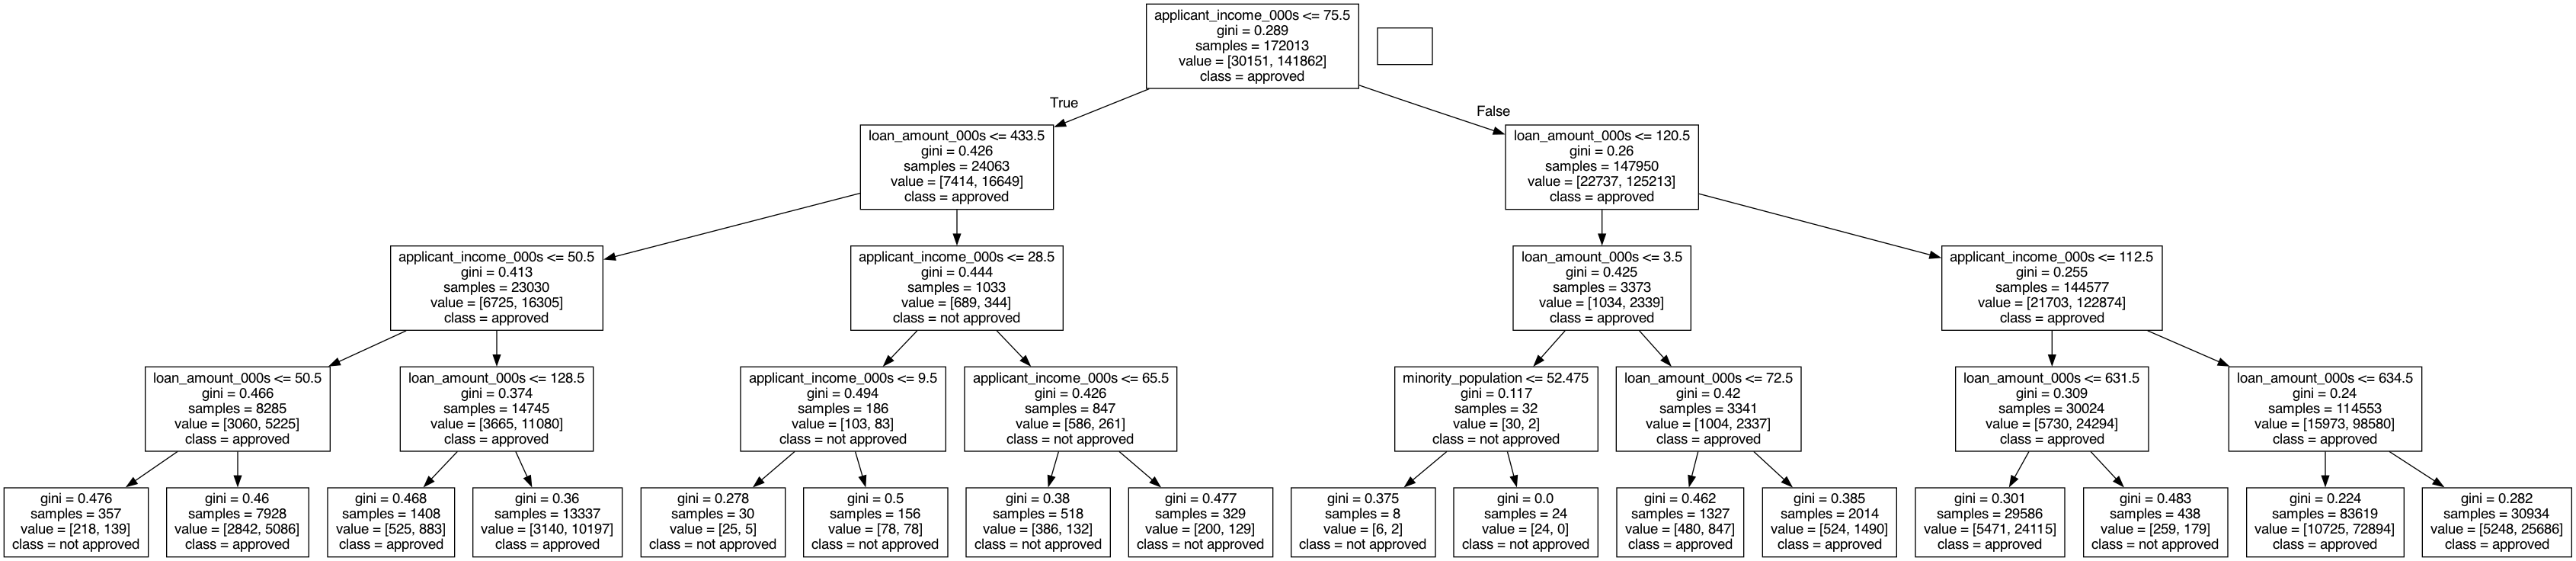

In [63]:
# Create DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=input_train.columns.values,  
                                class_names=['not approved', 'approved'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [64]:
from sklearn import metrics
metrics.confusion_matrix(target_test, target_pred)

array([[  507, 12425],
       [  312, 60476]])

In [65]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.62      0.04      0.07     12932
           1       0.83      0.99      0.90     60788

    accuracy                           0.83     73720
   macro avg       0.72      0.52      0.49     73720
weighted avg       0.79      0.83      0.76     73720



## Support Vector Machine (SVM) & Structural Risk Minimization (SRM)

In [66]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(input_train, target_train)

SVC()

In [ ]:
target_pred_class = clf.predict(input_train)
training_accuracy = metrics.accuracy_score(target_train, target_pred_class)
training_error = 1 - training_accuracy
print(training_error)

In [ ]:
target_pred_class = clf.predict(input_test)
testing_accuracy = metrics.accuracy_score(target_test, target_pred_class)
testing_error = 1 - testing_accuracy
print("SVM Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

In [ ]:
metrics.confusion_matrix(target_test, target_pred_class)

In [ ]:
print(classification_report(target_test, target_pred_class))